In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

# Import XGBoost
from xgboost.sklearn import XGBClassifier

In [12]:
df = pd.read_csv("Fraud (1).csv")

### EDA

In [13]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6376144,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1.0,0.0
6376145,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1.0,0.0
6376146,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1.0,0.0
6376147,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1.0,0.0


In [14]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3306196,252,PAYMENT,8674.72,C347669824,0.00,0.00,M852365895,0.00,0.00,0.0,0.0
3918800,284,CASH_OUT,190926.68,C1421670494,0.00,0.00,C2024043735,441021.80,631948.48,0.0,0.0
2688820,210,PAYMENT,8288.11,C71191054,0.00,0.00,M1104046827,0.00,0.00,0.0,0.0
4773402,335,PAYMENT,7610.46,C1673431079,11102.00,3491.54,M194752834,0.00,0.00,0.0,0.0
2581806,207,PAYMENT,4904.57,C1704023458,0.00,0.00,M102843329,0.00,0.00,0.0,0.0
6238878,590,PAYMENT,7337.62,C42426444,42262.63,34925.02,M990009541,0.00,0.00,0.0,0.0
5175742,357,CASH_IN,272066.91,C143619264,3445048.35,3717115.26,C1666713739,1415113.27,1143046.36,0.0,0.0
104185,10,CASH_IN,232037.29,C782531819,2997196.87,3229234.16,C511162177,487771.42,608983.09,0.0,0.0
3803653,281,CASH_OUT,90414.12,C1866726652,6919.00,0.00,C1677183004,89811.40,180225.52,0.0,0.0
292087,15,CASH_IN,7959.75,C1909297605,11260171.51,11268131.26,C1533835597,399167.61,391207.87,0.0,0.0


In [15]:
df.shape

(6376149, 11)

In [16]:
# Display the different types of transactions of the TYPE field
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [17]:
df['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [18]:
dfFraudPayment = df.loc[(df.isFraud == 1) & (df.type == 'PAYMENT')]
dfTotalPayment = df.loc[(df.type == 'PAYMENT')]

In [19]:
print("Number of fraudulent PAYMENTs = ", len(dfFraudPayment))
print("Number of non-fraudulent PAYMENTs = ", len(dfTotalPayment)-len(dfFraudPayment))
#print("Number of non-fraudulent PAYMENTs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'PAYMENT')]))

Number of fraudulent PAYMENTs =  0
Number of non-fraudulent PAYMENTs =  2155841


In [20]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfTotalTransfer = df.loc[(df.type == 'TRANSFER')]

print("Number of fraudulent TRANSFERs = ", len(dfFraudTransfer))
print("Number of non-fraudulent TRANSFERs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'TRANSFER')]))

Number of fraudulent TRANSFERs =  4102
Number of non-fraudulent TRANSFERs =  530052


In [21]:
dfFraudCashOut = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
dfTotalCashOut = df.loc[(df.type == 'CASH_OUT')]

print("Number of fraudulent CASH_OUTs = ", len(dfFraudCashOut))
print("Number of non-fraudulent CASH_OUTs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'CASH_OUT')]))


Number of fraudulent CASH_OUTs =  4121
Number of non-fraudulent CASH_OUTs =  2238350


In [22]:
dfFraudDebit = df.loc[(df.isFraud == 1) & (df.type == 'DEBIT')]
dfTotalDebit = df.loc[(df.type == 'DEBIT')]

print("Number of fraudulent DEBITs = ", len(dfFraudDebit))
print("Number of non-fraudulent DEBITs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'DEBIT')]))


Number of fraudulent DEBITs =  0
Number of non-fraudulent DEBITs =  41531


In [23]:
dfFraudCashIn = df.loc[(df.isFraud == 1) & (df.type == 'CASH_IN')]
dfTotalCashIn = df.loc[(df.type == 'CASH_IN')]

print("Number of fraudulent CASH_INs = ", len(dfFraudCashIn))
print("Number of fraudulent CASH_INs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'CASH_IN')]))


Number of fraudulent CASH_INs =  0
Number of fraudulent CASH_INs =  1402152


In [24]:
fraudTrans = (len(df['isFraud'].loc[(df.isFraud == 1)]))
print("total fraud transactions:", fraudTrans)

total fraud transactions: 8223


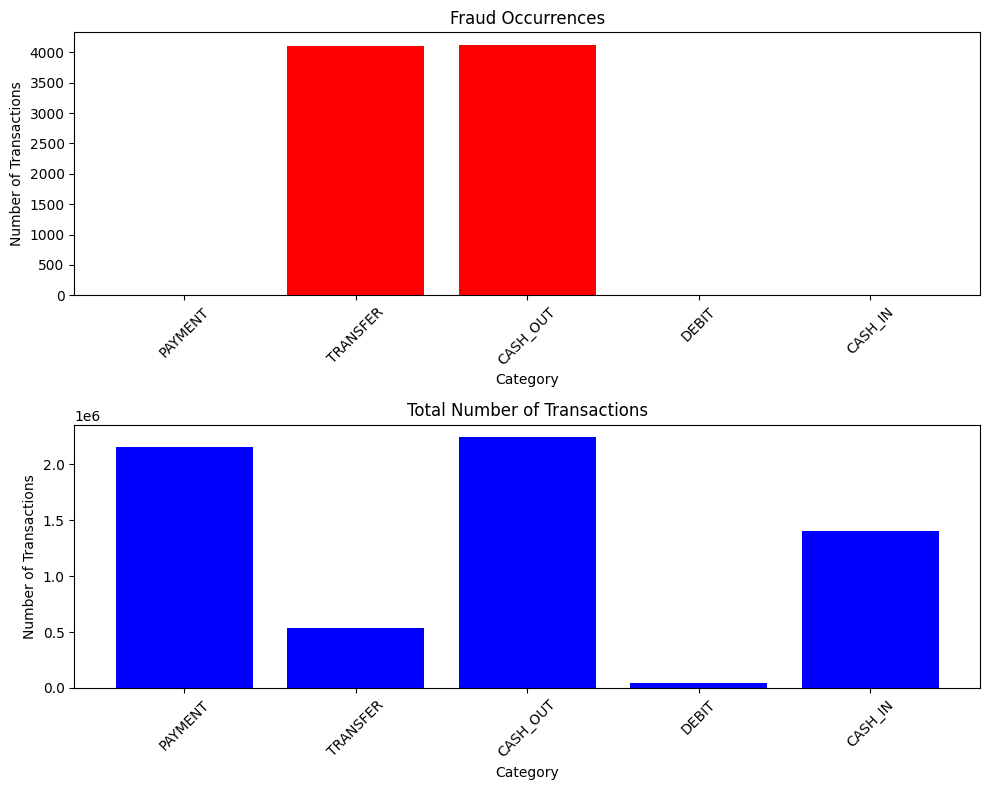

In [25]:
total = [len(dfTotalPayment), len(dfTotalTransfer), len(dfTotalCashOut), len(dfTotalDebit), len(dfTotalCashIn)]
fraud = [len(dfFraudPayment), len(dfFraudTransfer), len(dfFraudCashOut), len(dfFraudDebit), len(dfFraudCashIn)]
names = ["PAYMENT", "TRANSFER", "CASH_OUT", "DEBIT", "CASH_IN"]


fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].bar(names, fraud, color='red')
axs[0].set_title("Fraud Occurrences")
axs[0].set_ylabel("Number of Transactions")
axs[0].set_xlabel("Category")
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(names, total, color='blue')
axs[1].set_title("Total Number of Transactions")
axs[1].set_ylabel("Number of Transactions")
axs[1].set_xlabel("Category")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [26]:
dfFlagged = df.loc[df.isFlaggedFraud == 1]

In [27]:
dfFlagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1.0,1.0
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1.0,1.0
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1.0,1.0
5577242,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1.0,1.0
6009936,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1.0,1.0
6009938,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1.0,1.0
6182028,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1.0,1.0
6218968,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1.0,1.0
6279942,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1.0,1.0
6295011,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1.0,1.0


In [28]:
print(len(dfFlagged))

16


### data cleaning

In [29]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
# Drop irrelevant columns
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

Y = X['isFraud']

In [30]:
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1

# Convert X.type dtype column from string to int
X.type = X.type.astype(int)

# Display data
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.0,0.00,0.00,1.0
3,1,1,181.00,181.00,0.0,21182.00,0.00,1.0
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0.0
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0.0
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0.0
...,...,...,...,...,...,...,...,...
6376144,743,1,339682.13,339682.13,0.0,0.00,339682.13,1.0
6376145,743,0,6311409.28,6311409.28,0.0,0.00,0.00,1.0
6376146,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1.0
6376147,743,0,850002.52,850002.52,0.0,0.00,0.00,1.0


In [31]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]

In [32]:

X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), ['oldbalanceDest', 'newbalanceDest']] = - 1
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1.0
3,1,1,181.00,181.00,0.0,21182.00,0.00,1.0
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0.0
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0.0
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0.0
...,...,...,...,...,...,...,...,...
6376144,743,1,339682.13,339682.13,0.0,0.00,339682.13,1.0
6376145,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1.0
6376146,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1.0
6376147,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1.0


In [33]:
print("There are {} legit transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud.\n"\
      .format(len(X.loc[(X.oldbalanceOrg == 0.0) & (X.newbalanceOrig == 0) & (X.isFraud == 0)])))

print("There are {} fraud transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud."\
      .format(len(X.loc[(X.oldbalanceOrg == 0.0) & (X.newbalanceOrig == 0) & (X.isFraud == 1)])))

There are 1311631 legit transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud.

There are 41 fraud transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud.


### Feature Engg

In [34]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1.0,0.00,1.810000e+02
3,1,1,181.00,181.00,0.0,21182.00,0.00,1.0,0.00,2.136300e+04
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0.0,213808.94,1.827035e+05
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0.0,214605.30,2.377353e+05
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0.0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...
6376144,743,1,339682.13,339682.13,0.0,0.00,339682.13,1.0,0.00,0.000000e+00
6376145,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1.0,0.00,6.311409e+06
6376146,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1.0,0.00,1.000000e-02
6376147,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1.0,0.00,8.500025e+05


### Visualizations

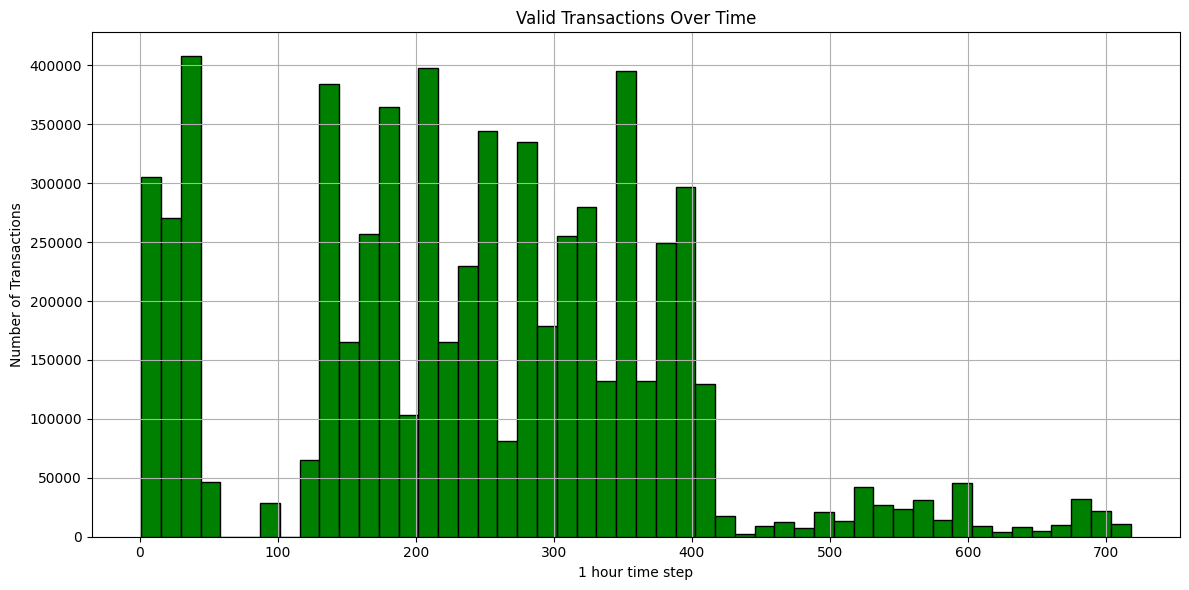

In [35]:

genuine = df[df["isFraud"] == 0].drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

plt.figure(figsize=(12, 6))
bins = 50
genuine['step'].hist(color='green', bins=bins, edgecolor='black')

plt.xlabel('1 hour time step')
plt.ylabel('Number of Transactions')
plt.title('Valid Transactions Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


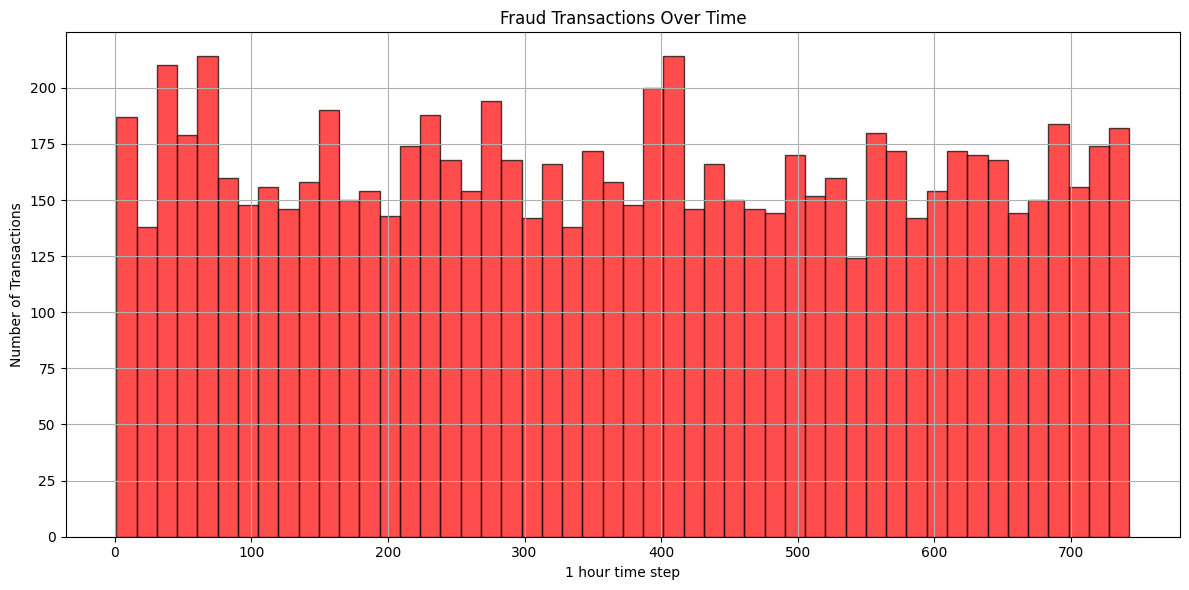

In [36]:
fraudulent = df[df["isFraud"] == 1].drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

plt.figure(figsize=(12, 6))
bins = 50
fraudulent['step'].hist(color='red', bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('1 hour time step')
plt.ylabel('Number of Transactions')
plt.title('Fraud Transactions Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# Get the transaction hour and day of transaction
X["HourOfDay"] = X.step % 24  # Calculate hour
X["DayOfWeek"] = X.step % 7   # Calculate day of week
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
2,1,0,181.00,181.00,0.0,-1.00,-1.00,1.0,0.00,1.810000e+02,1,1
3,1,1,181.00,181.00,0.0,21182.00,0.00,1.0,0.00,2.136300e+04,1,1
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0.0,213808.94,1.827035e+05,1,1
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0.0,214605.30,2.377353e+05,1,1
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0.0,300850.89,-2.401220e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6376144,743,1,339682.13,339682.13,0.0,0.00,339682.13,1.0,0.00,0.000000e+00,23,1
6376145,743,0,6311409.28,6311409.28,0.0,-1.00,-1.00,1.0,0.00,6.311409e+06,23,1
6376146,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1.0,0.00,1.000000e-02,23,1
6376147,743,0,850002.52,850002.52,0.0,-1.00,-1.00,1.0,0.00,8.500025e+05,23,1


In [38]:
# Remove irrelevant column
X = X.drop(['type'], axis = 1)
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
2,1,181.00,181.00,0.0,-1.00,-1.00,1.0,0.00,1.810000e+02,1,1
3,1,181.00,181.00,0.0,21182.00,0.00,1.0,0.00,2.136300e+04,1,1
15,1,229133.94,15325.00,0.0,5083.00,51513.44,0.0,213808.94,1.827035e+05,1,1
19,1,215310.30,705.00,0.0,22425.00,0.00,0.0,214605.30,2.377353e+05,1,1
24,1,311685.89,10835.00,0.0,6267.00,2719172.89,0.0,300850.89,-2.401220e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6376144,743,339682.13,339682.13,0.0,0.00,339682.13,1.0,0.00,0.000000e+00,23,1
6376145,743,6311409.28,6311409.28,0.0,-1.00,-1.00,1.0,0.00,6.311409e+06,23,1
6376146,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1.0,0.00,1.000000e-02,23,1
6376147,743,850002.52,850002.52,0.0,-1.00,-1.00,1.0,0.00,8.500025e+05,23,1


In [ ]:

X.to_csv('cleaned data.csv')


### model training

In [39]:
# Import XGBoost
from xgboost.sklearn import XGBClassifier

# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import GaussianNB
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

# RNN
import csv
import keras
import tensorflow as tf
from keras import backend as K

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,  average_precision_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
def showReport(testY, predictions):
  # Get confusion matrix results
  results = confusion_matrix(testY, predictions)
  # True Positive
  TP = results[0][0]
  # False Positive
  FP = results[0][1]
  # False Negative
  FN = results[1][0]
  # True Negative
  TN = results[1][1]

  # Calculate the total fraud detected - True Negative / total fraud (which is False Negative + True Negative)
  fraudDetected = TN / (FN + TN)

  print("TP = ", TP, "\t\t\tFP = ", FP, "\n")
  print("FN = ", FN, "\t\t\tTN = ", TN, "\n")
  print("% of fraud detected:\t", round(fraudDetected, 2), "(", fraudDetected ,")\n")
  print("% of fraud missed:\t", round((1 - fraudDetected), 2), "(", (1 - fraudDetected),")\n")
  print("Average Precision-Recall score:\t", average_precision_score(testY, predictions))

In [41]:
# Display all plots
def showPlots(model, testX, testY):
  # Plot the confusion matrix results
  class_names = ['Genuine', 'Fraud']
  plot_confusion_matrix(model, testX, testY, display_labels=class_names, values_format='')
  # Plot the Precision-Recall curve
  plot_precision_recall_curve(model, testX, testY)

### importing the clean data


In [42]:
data = X

In [43]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
2,1,181.00,181.00,0.0,-1.00,-1.00,1.0,0.00,1.810000e+02,1,1
3,1,181.00,181.00,0.0,21182.00,0.00,1.0,0.00,2.136300e+04,1,1
15,1,229133.94,15325.00,0.0,5083.00,51513.44,0.0,213808.94,1.827035e+05,1,1
19,1,215310.30,705.00,0.0,22425.00,0.00,0.0,214605.30,2.377353e+05,1,1
24,1,311685.89,10835.00,0.0,6267.00,2719172.89,0.0,300850.89,-2.401220e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6376144,743,339682.13,339682.13,0.0,0.00,339682.13,1.0,0.00,0.000000e+00,23,1
6376145,743,6311409.28,6311409.28,0.0,-1.00,-1.00,1.0,0.00,6.311409e+06,23,1
6376146,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1.0,0.00,1.000000e-02,23,1
6376147,743,850002.52,850002.52,0.0,-1.00,-1.00,1.0,0.00,8.500025e+05,23,1


In [44]:
X = data.drop(['isFraud'], axis = 1)
Y = data['isFraud']

In [45]:
data.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
2,1,181.00,181.00,0.0,-1.0,-1.00,1.0,0.00,181.00,1,1
3,1,181.00,181.00,0.0,21182.0,0.00,1.0,0.00,21363.00,1,1
15,1,229133.94,15325.00,0.0,5083.0,51513.44,0.0,213808.94,182703.50,1,1
19,1,215310.30,705.00,0.0,22425.0,0.00,0.0,214605.30,237735.30,1,1
24,1,311685.89,10835.00,0.0,6267.0,2719172.89,0.0,300850.89,-2401220.00,1,1
42,1,110414.71,26845.41,0.0,288800.0,2415.16,0.0,83569.30,396799.55,1,1
47,1,56953.90,1942.02,0.0,70253.0,64106.18,0.0,55011.88,63100.72,1,1
48,1,5346.89,0.00,0.0,652637.0,6453430.91,0.0,5346.89,-5795447.02,1,1
51,1,23261.30,20411.53,0.0,25742.0,0.00,0.0,2849.77,49003.30,1,1
58,1,62610.80,79114.00,16503.2,517.0,8383.29,0.0,0.00,54744.51,1,1


In [46]:
# Details about the dataset
pos, neg = np.bincount(Y)
total = neg + pos
print("Total transactions:\t\t", total,"\n")
print("Genuine transactions:\t\t", pos, "(", round((pos * 100 / total), 2), "%)\n")
print("Fraudulent transactions:\t", neg, "(", round((neg * 100 / total), 2), "%)\n")

Total transactions:		 2776625 

Genuine transactions:		 2768402 ( 99.7 %)

Fraudulent transactions:	 8223 ( 0.3 %)



In [47]:
# Split the data into 70% training and 30% testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state = 5)

### Random Forest

In [ ]:
forest = RandomForestClassifier(bootstrap = True, max_depth = 100, max_features = 2,
                                min_samples_leaf = 3, min_samples_split = 10, n_estimators = 200,
                                random_state = 10, verbose = 1, class_weight = "balanced")
# Train model with train data
forest.fit(trainX, trainY)

# Test model's predictions with test data
predictions = forest.predict(testX)

In [ ]:
showReport(testY, predictions)